## Check if the Patient has Diabetes
Author: Zamir Rizvi

### Overview
This project focuses on developing a machine learning-based solution to predict if a patient has diabetes based on metrics.

## Dataset
The dataset used to train the model contains (synthetic) health records of patients. The key features include:
* gender
* age
* hypertension
* heart_disease
* smoking_history
* bmi
* HbA1c_level
* blood_glucose_level
* diabetes

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import Model and Evaluators
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
"""
Data loading and Exploratory Data Analysis (EDA):
Load the dataset and explore data to provide basic insights into the dataset.
"""
#Load dataset
df = pd.read_csv('../archive/diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
def explore_data(data):
    data.head()
    data.describe()
    data.info()

In [5]:
def coorelation_heatmap(data):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='viridis')
    plt.title("Coorlation Heatmap")
    plt.show()

In [6]:
explore_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
"""
Data Preprocessing with Standardization
"""
#Encode categorical variables
df_transformed = pd.get_dummies(df, columns=['gender', 'smoking_history'])

In [8]:
explore_data(df_transformed)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  float64
 1   hypertension                 100000 non-null  int64  
 2   heart_disease                100000 non-null  int64  
 3   bmi                          100000 non-null  float64
 4   HbA1c_level                  100000 non-null  float64
 5   blood_glucose_level          100000 non-null  int64  
 6   diabetes                     100000 non-null  int64  
 7   gender_Female                100000 non-null  bool   
 8   gender_Male                  100000 non-null  bool   
 9   gender_Other                 100000 non-null  bool   
 10  smoking_history_No Info      100000 non-null  bool   
 11  smoking_history_current      100000 non-null  bool   
 12  smoking_history_ever         100000 non-null  bool   
 13  

In [9]:
#Generate random seed
np.random.seed(42)

#split data
X = df_transformed.drop('diabetes', axis=1)
y = df_transformed['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
#Standardizing numerical features
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_cols] = StandardScaler().fit_transform(X[numerical_cols])

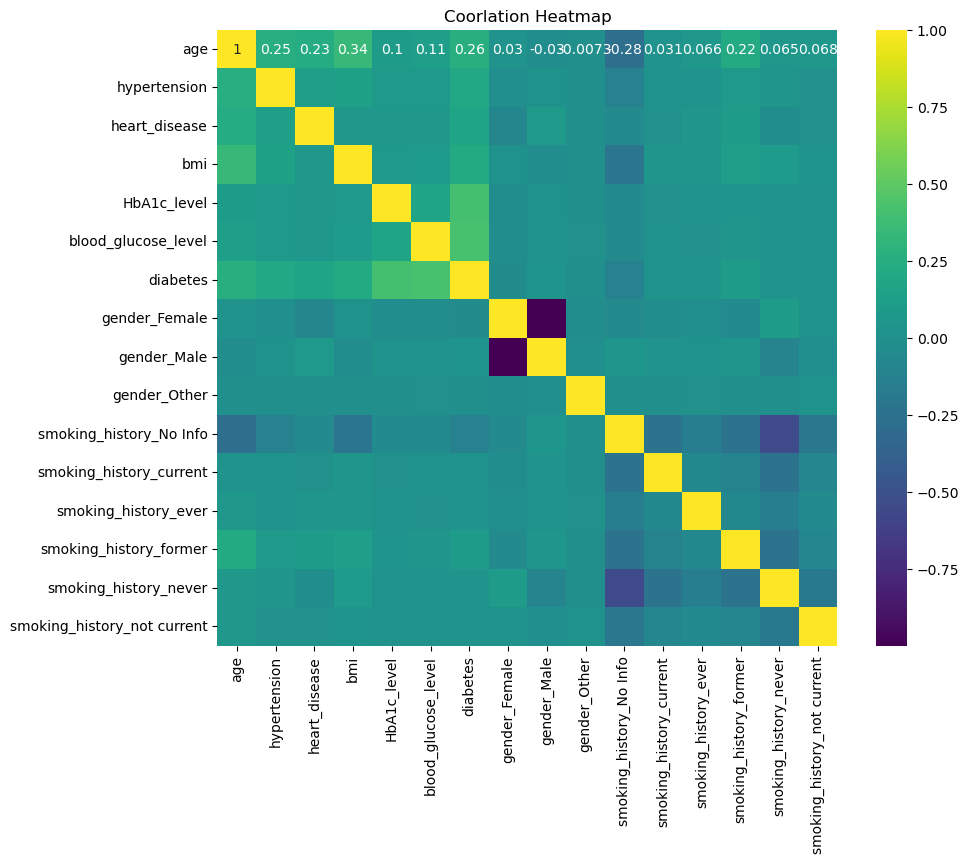

In [11]:
coorelation_heatmap(df_transformed)

In [12]:
#Train model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
#Model evaluation
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

In [14]:
pd.crosstab(y_test, y_pred)

col_0,0,1
diabetes,,
0,18224,68
1,535,1173


In [15]:
clf.score(X_test, y_test)

0.96985

In [16]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [17]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[18224    68]
 [  535  1173]]


In [19]:
def plot_roc_curve(y_true, y_pred_proba):
    """
    Plot the ROC curve for the given true labels and predicted probabilities.

    Args:
    y_true: True labels.
    y_pred_proba: Predicted probabilities for the positive class.

    Returns:
    None. Displays the ROC curve plot.
    """
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


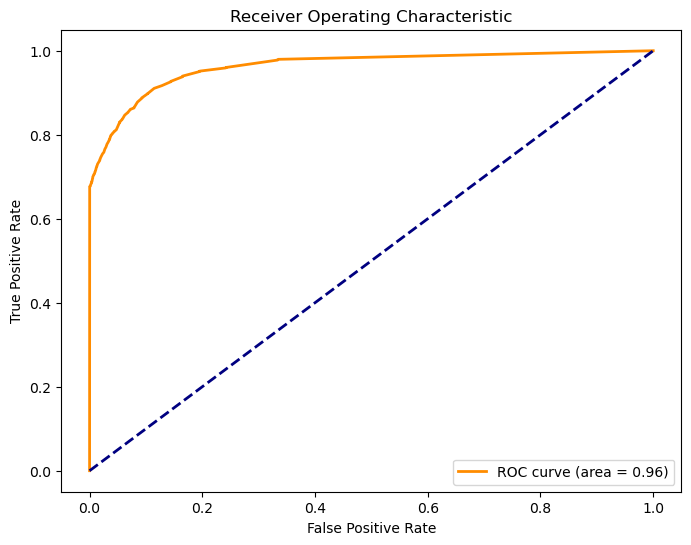

In [20]:
plot_roc_curve(y_test, y_pred_proba)

C:\Users\zuriz\OneDrive\Documents\WGU\CAPSTONE\capstone\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 800x600 with 0 Axes>

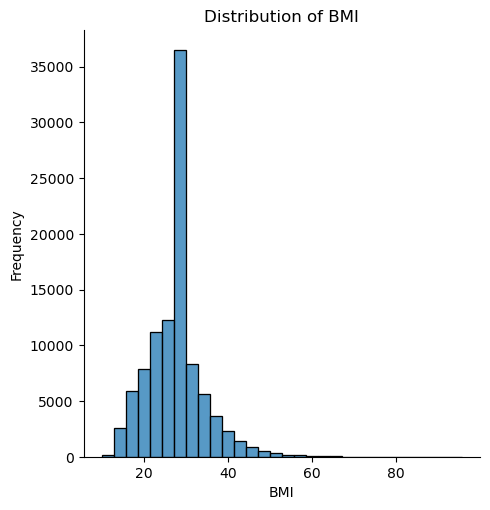

In [29]:

    # Example: Distribution plot of BMI
    plt.figure(figsize=(8, 6))
    sns.displot(df_transformed['bmi'], bins=30)  
    plt.title('Distribution of BMI')
    plt.xlabel('BMI')
    plt.ylabel('Frequency')
    plt.show()
    


C:\Users\zuriz\OneDrive\Documents\WGU\CAPSTONE\capstone\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zuriz\OneDrive\Documents\WGU\CAPSTONE\capstone\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


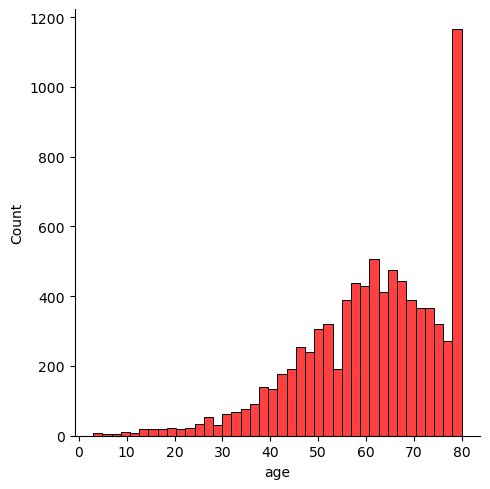

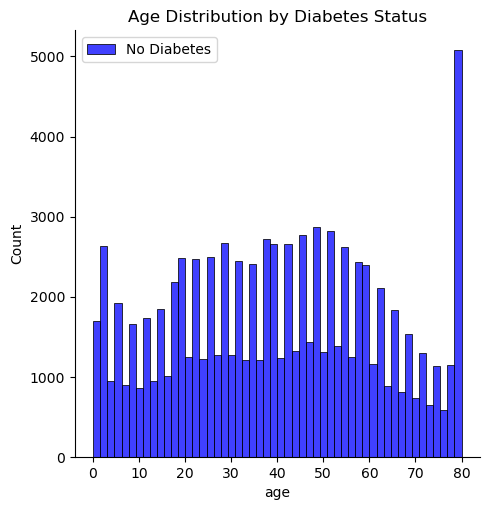

In [22]:


# Replace 'age' with the column you wish to visualize from your DataFrame
sns.displot(df['age'][df['diabetes'] == 1], color='red', label='Diabetes')
sns.displot(df['age'][df['diabetes'] == 0], color='blue', label='No Diabetes')
plt.title('Age Distribution by Diabetes Status')
plt.legend()
plt.show()


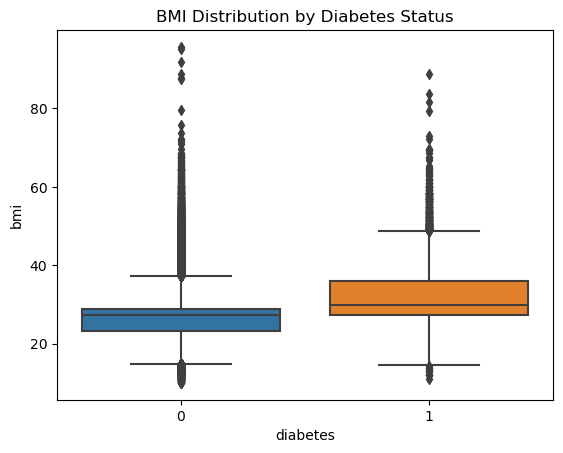

In [30]:
# Replace 'bmi' with the variable of interest
sns.boxplot(x='diabetes', y='bmi', data=df_transformed)
plt.title('BMI Distribution by Diabetes Status')
plt.show()


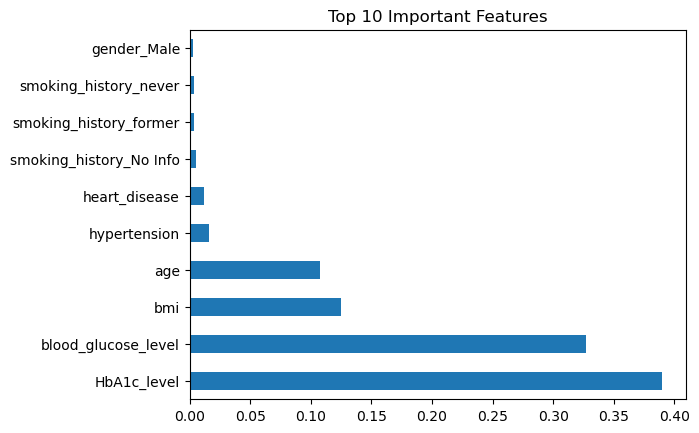

In [24]:

# Assuming clf is your trained RandomForestClassifier model and df_transformed is your DataFrame
feature_importances = pd.Series(clf.feature_importances_, index=df_transformed.drop('diabetes', axis=1).columns)
feature_importances.nlargest(10).plot(kind='barh')  # Adjust the number as needed
plt.title('Top 10 Important Features')
plt.show()


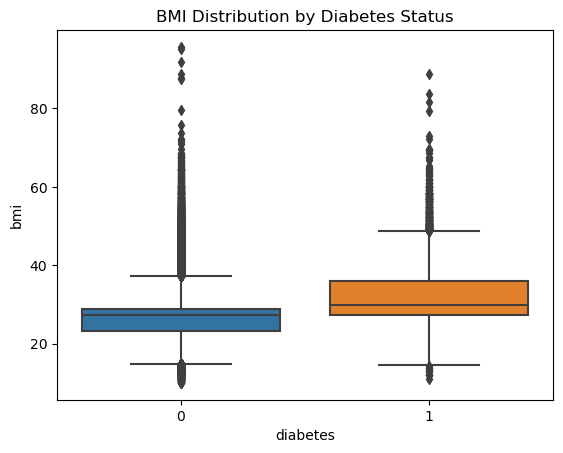

In [25]:
# Replace 'bmi' with the variable of interest
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI Distribution by Diabetes Status')
plt.show()


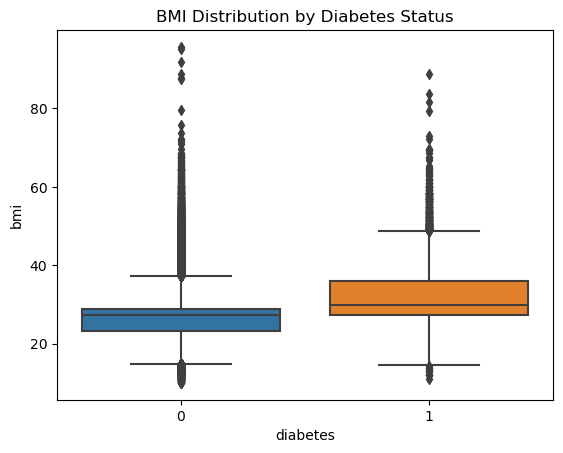

In [26]:
# Replace 'bmi' with the variable of interest
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI Distribution by Diabetes Status')
plt.show()


In [27]:
def accuracy_evaluation(y_test, y_pred, y_pred_proba):

    # Assuming y_test are your true labels and y_pred are the predictions made by your model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)  # y_pred_proba is the probability output from the model
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC Score: {roc_auc:.2f}")


In [28]:
accuracy_evaluation(y_test, y_pred, y_pred_proba)

Accuracy: 0.97
Precision: 0.95
Recall: 0.69
F1 Score: 0.80
ROC-AUC Score: 0.96
